# Buffon's Needle

There is a great description on the wikipedia.

https://en.wikipedia.org/wiki/Buffon%27s_needle

In [1]:
# Package management
import math
import random
import matplotlib.pyplot as plt
import time

Needle class

In [2]:
class needle:

     # This is the needle class.  An instance has x and y coordinates
     # and an angle relative to the x-axis.  It also has a length in
     # dimensionless units.

    def __init__(self):
        self.x = random.random()*10.0
        self.y = random.random()*10.0
        self.theta = random.random()*2*math.pi
        self.length = 1.0

    def crosscheck(self):
        # This function checks to see if the needle
        # crosses the closest line.

        # Find closest line
        close_line = round(self.x)

        # Calculate projection along x-axis
        x_proj = math.cos(self.theta)*self.length/2

        #Check for crossing.  If the projection is greater
        # than the distance from the closest line then the 
        # needle crosses.
        if math.fabs(x_proj) > math.fabs(self.x - close_line):
            cross = 1
        else:
            cross = 0

        return cross


    def endpoints(self):

        # Use basic trigonometry to calculate
        # the endpoints of the needle.
        x_proj = math.cos(self.theta)*self.length/2
        y_proj = math.sin(self.theta)*self.length/2
        x =  [self.x + x_proj, self.x - x_proj]
        y =  [self.y + y_proj, self.y - y_proj]
        pts = [x,y]

        return pts

Plotting function

In [3]:
def needle_plotter(span,needle_len,num_plots,ax):

    # This function solves the full 2-D problem to make a nice cartoon.

    for i in range(num_plots):

        # Instantiate needle
        n = needle()
        
        # set color scheme
        t20 = color_maker()

        # Test for crossing
        # If the length of the projecting is greater than the distance away from a
        # bounding line, then "cross" is incremented and the needle is plotted red.
        pts = n.endpoints()

        if n.crosscheck():
            ax.plot(pts[0],pts[1], c=t20[6], linewidth = 1)
        # If not, then cross = 0
        else: 
            ax.plot(pts[0],pts[1], c=t20[0], linewidth = 1)
    
    # Format plot 
    xgrid = range(span+1)
    plt.vlines(xgrid,-1,span+1) 
    plt.axis('off')   

Lean simulation function

In [4]:
def needle_dropper():

# This function is the efficient 1-D needle calculation.  
# It solves the statistical aspect of the problem but does not contain
# the end-point calculations required for plotting.  
    
    # Generate random needle drop                         
    n = needle()
    
    # Calculate projection of the needle along x-axis

    cross = n.crosscheck() 
        
    return cross 

Conduct a trial with a specified number of needle drops

In [5]:
def trial(num_drops):
    # This function takes an integer and performs a  
    # trial of needle drops and returns an estimate for pi.  

    # Intitialize number of needles which cross grid lines
    num_cross = 0

    # Loop through number of needles (num_drops)
    for num in range(num_drops):
        
        # Call needle_dropper
        cross = needle_dropper()

        # Increment num_cross
        num_cross = num_cross + cross

    # Calculate estimate of pi
    pi_est = (2*num_drops)/float(num_cross)

    return pi_est    

Conduct a batch of trials, each with an identical number of needle drops.

In [6]:
def batch(num_trials,num_drops):

    # This takes two integers, num_drops and num_trials,
    # and performs a batch of trials with the same number
    # needle drops. It reteruns a list with the estimates
    # of pi for each trial.
 
    print("Initiating ",num_trials," trials of ",num_drops, " needles.")
    
    # Intialize list
    estimates = []

    # Loop for trials
    for i in range(num_trials):

        pi_est = trial(num_drops)

        estimates.append(pi_est)

        if (i+1)%10 == 0:
            print("Trial ",str(i+1)," complete")

    return estimates

Set the color scheme

In [7]:
# This is from http://www.randalolson.com/
def color_maker():
    # Set color scheme for plots
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
    
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)
        
    return tableau20

Main simulation

In [8]:
def main():
    #start timer 
    st = time.time()

    # Set color scheme
    t20 = color_maker()    

    # Define the number of trials  in each batch  
    num_trials = 50

    # Grid span
    span = 10
    
    # Length of needle
    needle_len = 1.0
    
    # Grid spacing
    #Lgrid = 1.0

    # Number of needles to plot in the cartoon representation
    num_plots = 200

    # Intialize list of legend labels  
    legend_labels = []
     
    # Intitalize figure   
    f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (24,8))
      
    # Define number of needles per trial for the first figure.
    num_drops = [10, 100, 1000]

    # Loop through num_drops
    for k in range(len(num_drops)):

        # Run a batch of trials
        estimates = batch(num_trials,num_drops[k])

        # Update legend labels
        legend_labels.append(str(num_drops[k]))

        # Plot distribution of estimates on histogram
        ax1.hist(estimates,facecolor = t20[k]) 

    # Format plot
    ax1.legend(legend_labels)
    ax1.set_xlabel('Pi Estimate')
    ax1.set_ylabel('Number of Occurances')
    ax1.set_title('Low Resolution')
 
    # Reset legend labels  
    legend_labels = []
    
    # Copy last legend entry 
    legend_labels.append(str(num_drops[-1]))
    
    # Replot last distribution for scale on second histogram
    ax2.hist(estimates,facecolor = t20[k])

    # Define number of needles per trial for the second figure.
    num_drops = [10000,100000]    

    # Loop through num_drops
    for k in range(len(num_drops)):

        # Run a batch of trials
        estimates = batch(num_trials,num_drops[k])

        # Update legend labels
        ax2.hist(estimates,facecolor = t20[k+3]) 

        # Plot distribution of estimates on histogram
        legend_labels.append(str(num_drops[k]))

    # Format plot
    ax2.legend(legend_labels)    
    ax2.set_xlabel('Pi Estimate')
    ax2.set_ylabel('Number of Occurances')
    ax2.set_title('High Resolution')
        
    # Make cartoon in third axis   
    needle_plotter(span,needle_len,num_plots,ax3)

    # Set title
    ax3.set_title('Cartoon')

    # Show the plot          
    plt.show()

    # Print the runtime
    print('\n Runtime: ',(time.time() - st),' seconds.')

Execute.

Initiating  50  trials of  10  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete
Initiating  50  trials of  100  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete
Initiating  50  trials of  1000  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete
Initiating  50  trials of  10000  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete
Initiating  50  trials of  100000  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete


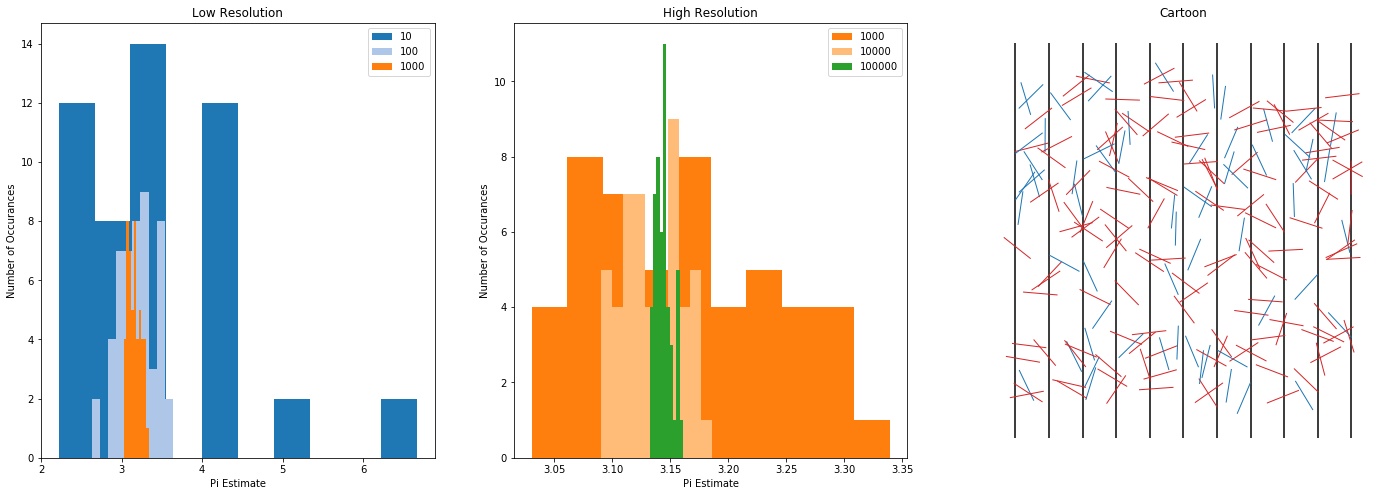


 Runtime:  13.076618909835815  seconds.


In [9]:
main()